# Telco Customer Churn Prediction and Retention Strategy Portfolio Project

## 1. Data Collection

In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\HP\Videos\PortfolioDS\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Display the first few rows and summary information about the dataset
df.head(), df.info(), df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovies      

## 2. Data Preprocessing

### a. Handle Missing Values and Convert Data Types

In [2]:
# Convert 'TotalCharges' to numeric, handling non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing 'TotalCharges'
telco_data = df.dropna(subset=['TotalCharges'])

### b. Encode Categorical Variables

In [3]:
# One-hot encode categorical variables
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

telco_data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### c. Scale Numerical Features

In [4]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
telco_data_encoded[numerical_cols] = scaler.fit_transform(telco_data_encoded[numerical_cols])

## 3. Exploratory Data Analysis (EDA)

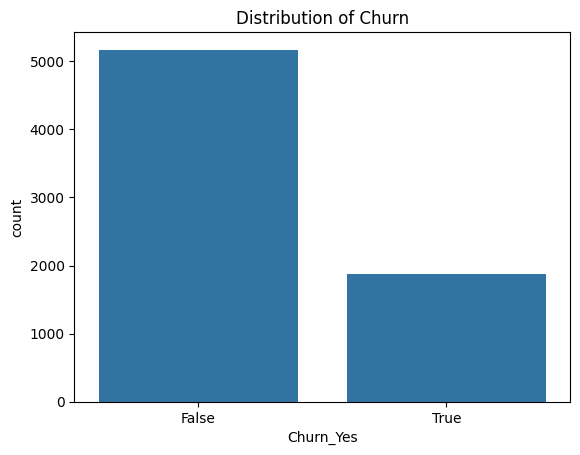

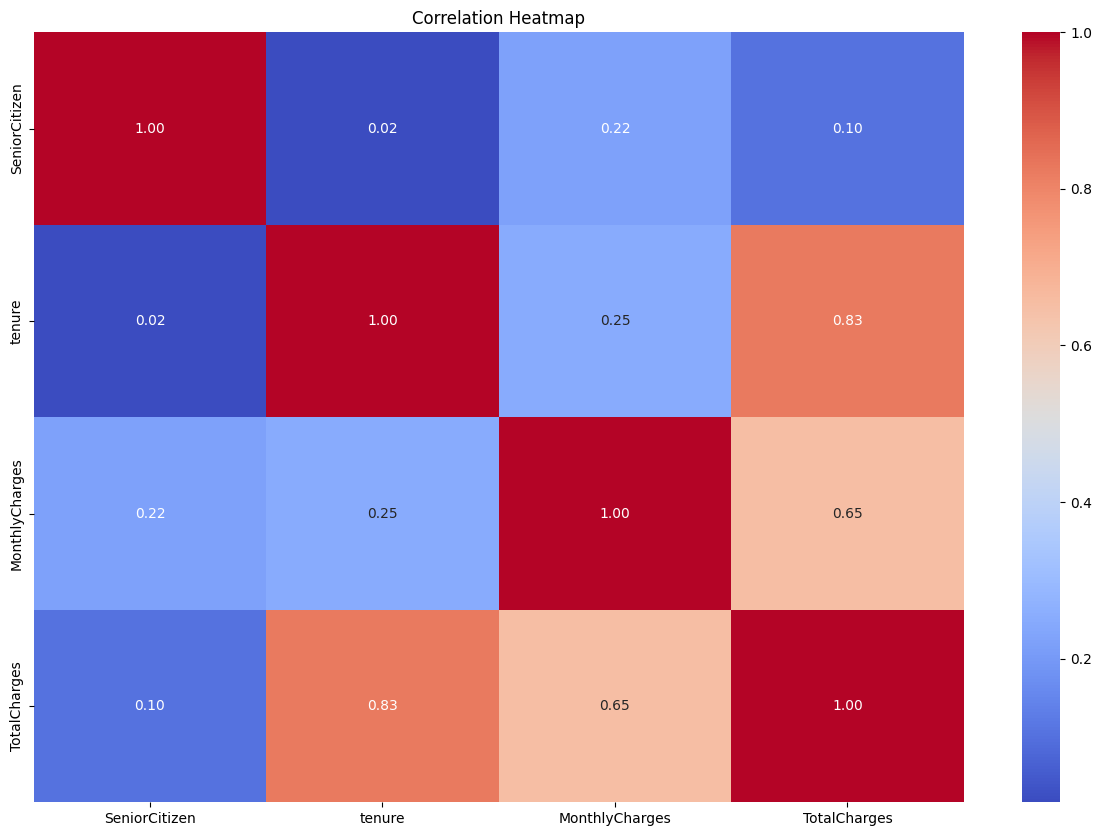

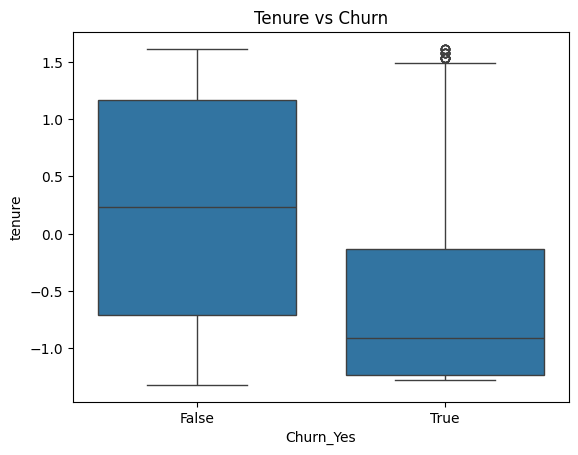

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove non-numeric columns
numeric_data = telco_data_encoded.select_dtypes(include=['float64', 'int64'])

# Visualizing distribution of churn
sns.countplot(x='Churn_Yes', data=telco_data_encoded)
plt.title('Distribution of Churn')
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot to visualize tenure vs churn
sns.boxplot(x='Churn_Yes', y='tenure', data=telco_data_encoded)
plt.title('Tenure vs Churn')
plt.show()

## 4. Feature Engineering

In [6]:
# creating a new feature for tenure groups
telco_data_encoded['tenure_group'] = pd.cut(telco_data['tenure'], bins=[0, 12, 24, 48, 60, 72],
                                            labels=['0-12', '12-24', '24-48', '48-60', '60-72'])

# One-hot encode the new feature
telco_data_encoded = pd.get_dummies(telco_data_encoded, columns=['tenure_group'], drop_first=True)

## 5. Model Development

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Example dataset loading (replace with your dataset loading code)
# telco_data_encoded = pd.read_csv('path_to_your_data.csv')

# Print columns to verify
print("Columns in DataFrame:", telco_data_encoded.columns)

# Define the feature columns based on actual names
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
            'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
            'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
            'PaymentMethod_Mailed check']

# Check if all features are present in the DataFrame
missing_features = [f for f in features if f not in telco_data_encoded.columns]
if missing_features:
    raise ValueError(f"Missing columns: {missing_features}")

# Prepare the feature matrix X and target vector y
X = telco_data_encoded[features]
y = telco_data_encoded['Churn_Yes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Logistic Regression Model with increased iterations
log_reg = LogisticRegression(max_iter=200, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Random Forest Model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_imputed, y_train)
y_pred_rf = rf_clf.predict(X_test_imputed)

# Model Evaluation
metrics = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_log), precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_rf)],
    'F1 Score': [f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_rf)],
    'AUC': [roc_auc_score(y_test, y_pred_log), roc_auc_score(y_test, y_pred_rf)]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

Columns in DataFrame: Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes', 'tenure_group_12-24', 'tenure_group_24-48',
       'tenure_group_48-60', 'tenure_group_60-72'],

## 6. Interpretability and Feature Importance

Shape of selected shap_values: (2113, 10, 2)
Shape of X_test_imputed: (2113, 10)


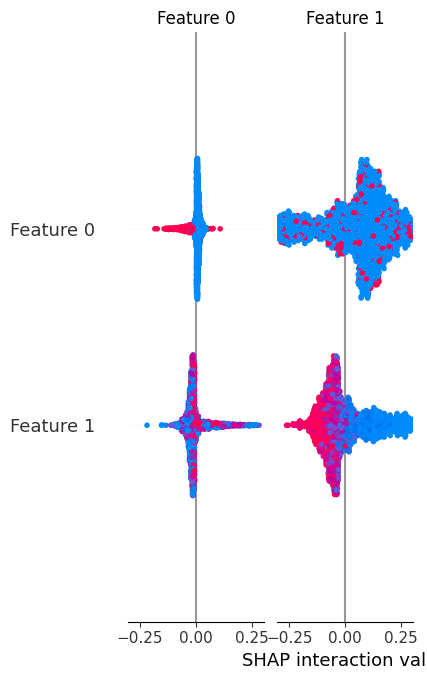

In [13]:
import shap

# SHAP Analysis
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test_imputed)

# Check the type and shape of shap_values
if isinstance(shap_values, list):
    print(f"Number of classes: {len(shap_values)}")
    for i, values in enumerate(shap_values):
        print(f"Shape of shap_values for class {i}: {values.shape}")
    # For binary classification, class_index = 1 (usually for the positive class)
    class_index = 1
    shap_values_correct = shap_values[class_index]
else:
    shap_values_correct = shap_values

print("Shape of selected shap_values:", shap_values_correct.shape)
print("Shape of X_test_imputed:", X_test_imputed.shape)

# Ensure that shap_values_correct matches the shape of X_test_imputed
if shap_values_correct.shape[0] == X_test_imputed.shape[0] and shap_values_correct.shape[1] == X_test_imputed.shape[1]:
    # Plot the summary plot with increased size
    shap.summary_plot(shap_values_correct, X_test_imputed)  
else:
    print("Mismatch in shape. Please check your shap_values and X_test_imputed.")

## 7. Retention Strategy Development

#### Based on SHAP and model insights, propose strategies, such as:

1. Personalized offers for customers with high churn risk.
2. Improved customer service for segments showing high churn.
3. Targeted marketing campaigns for customers with shorter tenure.

In [14]:
import joblib
import os

# Create a 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the models in the 'models' folder
joblib.dump(log_reg, 'models/logistic_regression_model.pkl')
joblib.dump(rf_clf, 'models/random_forest_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(imputer, 'models/imputer.pkl')

['models/imputer.pkl']